In [76]:
#import dependencies
import pandas as pd
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns
 


In [23]:
measurements_df = pd.read_csv("clean_hm_df.csv")

stations_df = pd.read_csv("clean_hs_df.csv")

In [2]:
#connect to sqlite database
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
#reflect database into ORM classes
Base = automap_base()

Base.prepare(engine, reflect=True)

Base.classes.keys()

['Measurements', 'Stations']

In [4]:
#save references to each table

Measurements = Base.classes.Measurements
Stations = Base.classes.Stations

In [5]:
#create database session object

session = Session(engine)

In [17]:
#set vacation dates

vac_start_date = "2016-07-02"

vac_end_date = "2016-07-10"

In [47]:
#precip for last full year of data

end_date = measurements_df["date"].max()

start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

precip_period = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date>=start_date).all()

precip_df = pd.DataFrame(precip_period, columns=["date", "precipitation"])

precip_df.set_index(precip_df["date"], inplace=True)

precip_df.head()

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


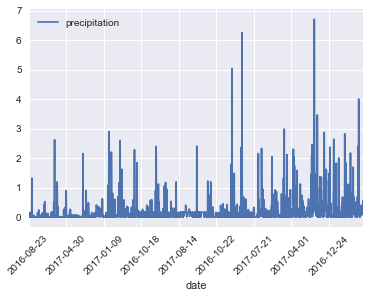

In [100]:
# plot results in matplotlib

precip_df.plot(x_compat=True)

plt.xticks(rotation="45")

plt.show()

plt.savefig("precip.png")

In [51]:
# summary statistics for precipitation data
precip_df.describe()

,precipitation
count,2230.000000
mean,0.175720
std,0.439063
min,0.000000
25%,0.000000
50%,0.030000
75%,0.160644
max,6.700000


In [56]:
# design query for number of stations

num_stations = session.query(Stations).count()

print("There are " + str(num_stations) + " total stations.")

There are 9 total stations.


In [62]:
# design query to find most active stations

session.query(Measurements.station, func.count(Measurements.station))\
    .group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
    
#station USC00519281 had the highest number of observations 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).

last_year_temp = session.query(Measurements.tobs).\
        filter(Measurements.date>=start_date).\
        filter(Measurements.station == "USC00519281").all()
    
last_year_temp

[(77),
 (77),
 (80),
 (80),
 (75),
 (73),
 (78),
 (77),
 (78),
 (80),
 (80),
 (78),
 (78),
 (78),
 (73),
 (74),
 (80),
 (79),
 (77),
 (80),
 (76),
 (79),
 (75),
 (79),
 (78),
 (79),
 (78),
 (78),
 (76),
 (74),
 (77),
 (78),
 (79),
 (79),
 (77),
 (80),
 (78),
 (78),
 (78),
 (77),
 (79),
 (79),
 (79),
 (79),
 (75),
 (76),
 (73),
 (72),
 (71),
 (77),
 (79),
 (78),
 (79),
 (77),
 (79),
 (77),
 (78),
 (78),
 (78),
 (78),
 (77),
 (74),
 (75),
 (76),
 (73),
 (76),
 (74),
 (77),
 (76),
 (76),
 (74),
 (75),
 (75),
 (75),
 (75),
 (71),
 (63),
 (70),
 (68),
 (67),
 (77),
 (74),
 (77),
 (76),
 (76),
 (75),
 (76),
 (75),
 (73),
 (75),
 (73),
 (75),
 (74),
 (75),
 (74),
 (75),
 (73),
 (75),
 (73),
 (73),
 (74),
 (70),
 (72),
 (70),
 (67),
 (67),
 (69),
 (70),
 (68),
 (69),
 (69),
 (66),
 (65),
 (68),
 (62),
 (75),
 (70),
 (69),
 (76),
 (76),
 (74),
 (73),
 (71),
 (74),
 (74),
 (72),
 (71),
 (72),
 (74),
 (69),
 (67),
 (72),
 (70),
 (64),
 (63),
 (63),
 (62),
 (70),
 (70),
 (62),
 (62),
 (63),
 (65),

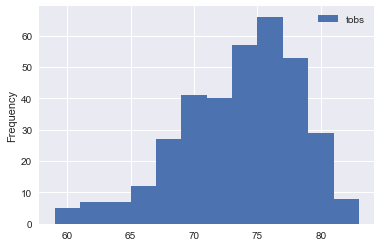

In [101]:
#construct dataframe on temp data


temp_df = pd.DataFrame(last_year_temp, columns=["tobs"])

temp_df.head()

#create histogram and plot data

sns.set()

temp_df.plot.hist(bins=12)

plt.savefig("temp.png")

plt.show()

In [83]:
#Write a function called calc_temps that will accept a start 
#date and end date in the format %Y-%m-%d and return the minimum, 
#average, and maximum temperatures for that range of dates.

def calc_temps(start_date, end_date):

    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
            filter(Measurements.date>=start_date).\
            filter(Measurements.date<=end_date).all()
                                                    
print(calc_temps(vac_start_date, vac_end_date))                                                    

[(71, 76.9074074074074, 82)]


In [88]:
#Use the calc_temps function to calculate the min, avg, 
#and max temperatures for your trip using the matching dates from the previous year 
#(i.e. use "2017-01-01" if your trip start date was "2018-01-01")

vac_prev_start = dt.date(2015, 7, 2) - dt.timedelta(days=365)
vac_prev_end = dt.date(2015, 7, 10) - dt.timedelta(days=365)

trip_min, trip_avg, trip_max = calc_temps(vac_prev_start, vac_prev_end)[0]

print(trip_min, trip_avg, trip_max)

68 75.6029411764706 82


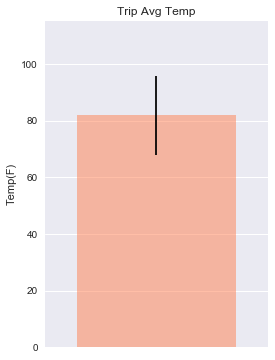

In [102]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

fig,ax = plt.subplots(figsize=(4,6))
xpos = 1
yerr = trip_max - trip_min

ax.bar(xpos, trip_max, yerr=yerr, alpha = .5 , color="coral", align = "center")
ax.set(xticks=range(xpos), xticklabels="a", title="Trip Avg Temp", ylabel="Temp(F)")
ax.margins(.2, .2)

plt.savefig("trip_temp.png")

plt.show()